In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# LOAD THE DATA SET

In [2]:
#Load data to be worked on

mydata_set = pd.read_csv("Customer-Churn.csv")
mydata_set.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check to see if there are any redundant features
# Before dropping any columns that may not be necessary for EDA, check to see if there are any duplicates.

mydata_set = mydata_set.drop_duplicates(keep = "first", ignore_index= True)
mydata_set.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Observation:
There are no duplicates, all the values are unique.

In [4]:
# drop columnn customerID as this does not have direct impact on the EDA
mydata_set = mydata_set.drop(["customerID"], axis = 1)

In [5]:
#Check the features of the data

mydata_set.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## DATA VERIFICATION

In [ ]:
# Check the data type, number of features and rows, missing data, clean up the data

In [34]:
numerical_df = mydata_set.describe().T
numerical_df

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


In [33]:
categorical_df = mydata_set.select_dtypes(include = "object")
categorical_df.describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [7]:
mydata_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
#Display where the missing data is located

mydata_set.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

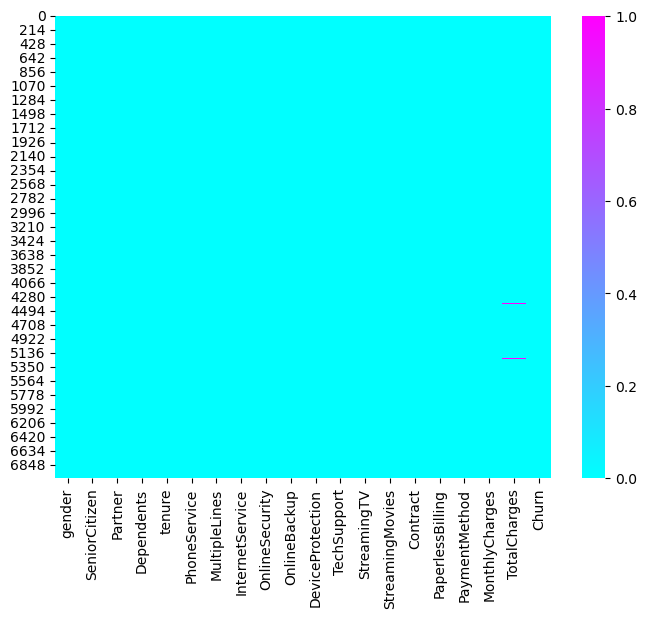

In [9]:
# The TotalCharges feature has some missing data
# We will use a HeatMap to visualize the data

plt.figure(figsize = (8,6))
sns.heatmap(data = mydata_set.isnull(), cbar=True, cmap="cool");

In [10]:
# We would use the median to fill in the missing data
# Calculate Median for TotalCharges

totalcharges_median = mydata_set['TotalCharges'].median()
totalcharges_median

1397.475

In [11]:
# Use the calculated median to fill null for TotalCharges 

mydata_set['TotalCharges'] = mydata_set['TotalCharges'].fillna(totalcharges_median)

In [12]:
# Run the data to see that missing values have been filled

mydata_set.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## EXPLORATORY DATA ANALYSIS

In [16]:
#Using the headers, we will extract some key features for exploration

#Display the first row of the data set
mydata_set.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### a) Visualize relationships between the label (Churn) and some key features

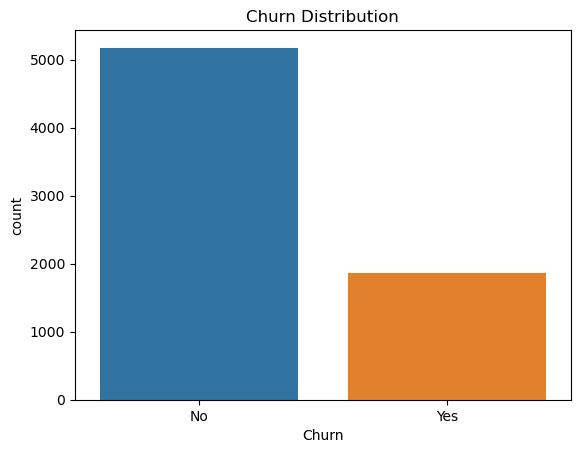

In [20]:
# First we visualize churn distribution
sns.countplot(x='Churn', data=mydata_set)
plt.title('Churn Distribution')
plt.show()

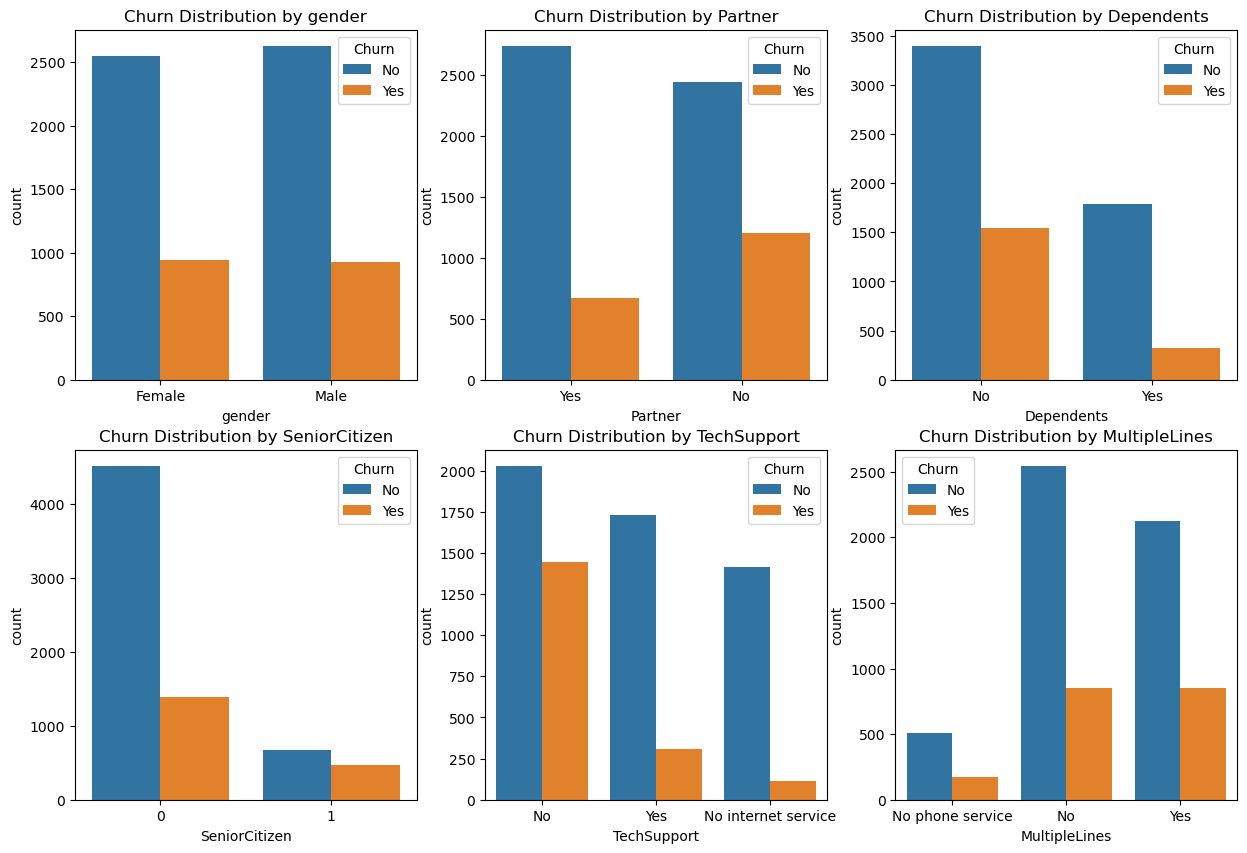

In [30]:
# Visualize churn distribution by some categorical variables

categorical_vars = ['gender', 'Partner', 'Dependents', 'SeniorCitizen', 'TechSupport', 'MultipleLines']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='Churn', data=mydata_set, ax=axes[i]);
    axes[i].set_title(f'Churn Distribution by {var}');
    
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

### b). Explore correlations

In [109]:
# Correlation heatmap
# To explore this we need to compute correlation between numerical variables

numerical_vars = mydata_set.select_dtypes(include = ["float64", "int64"])
numerical_vars.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [110]:
# Create a correlation plot for numerical data 

numerical_vars.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


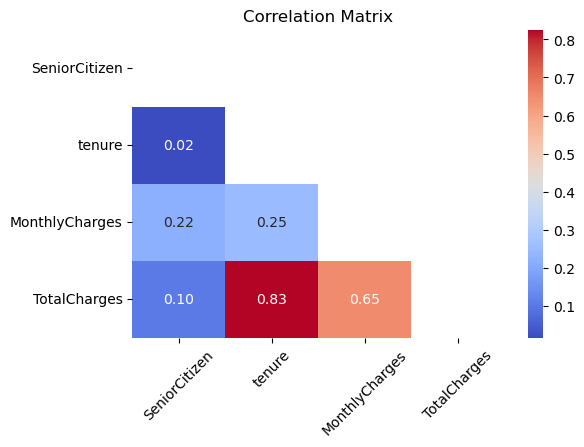

In [113]:
# Visualize correlation matrix
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(numerical_vars.corr(), dtype = bool))
sns.heatmap(numerical_vars.corr(), annot=True, cmap='coolwarm', fmt=".2f", mask = mask)
plt.title('Correlation Matrix')
plt.xticks(rotation = 45);
plt.show()

### c) Conduct univariate, bivariate, and multivariate analysis

#### Univariate analysis

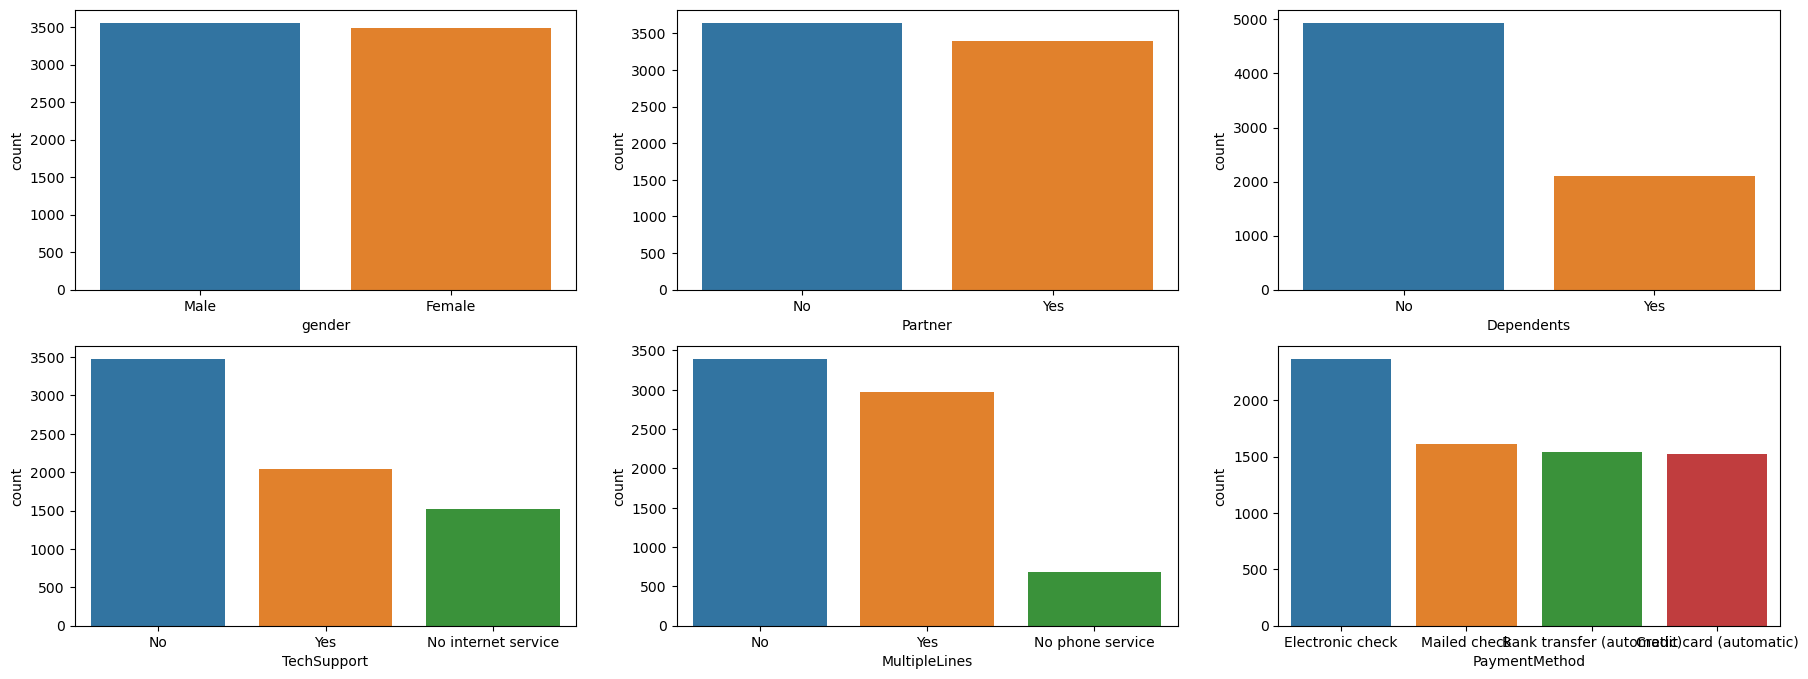

In [61]:
# Univariate analysis of some key variablees

categorical_list = ['gender', 'Partner', 'Dependents', 'TechSupport', 'MultipleLines', 'PaymentMethod']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 8))
axes = axes.flatten()

for i, var in enumerate(categorical_list):
    ax = axes[i]
    sns.countplot(data=mydata_set, x=var, ax=axes[i], order = categorical_df[var].value_counts().index);
    
    
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

#### Bivariate Analysis

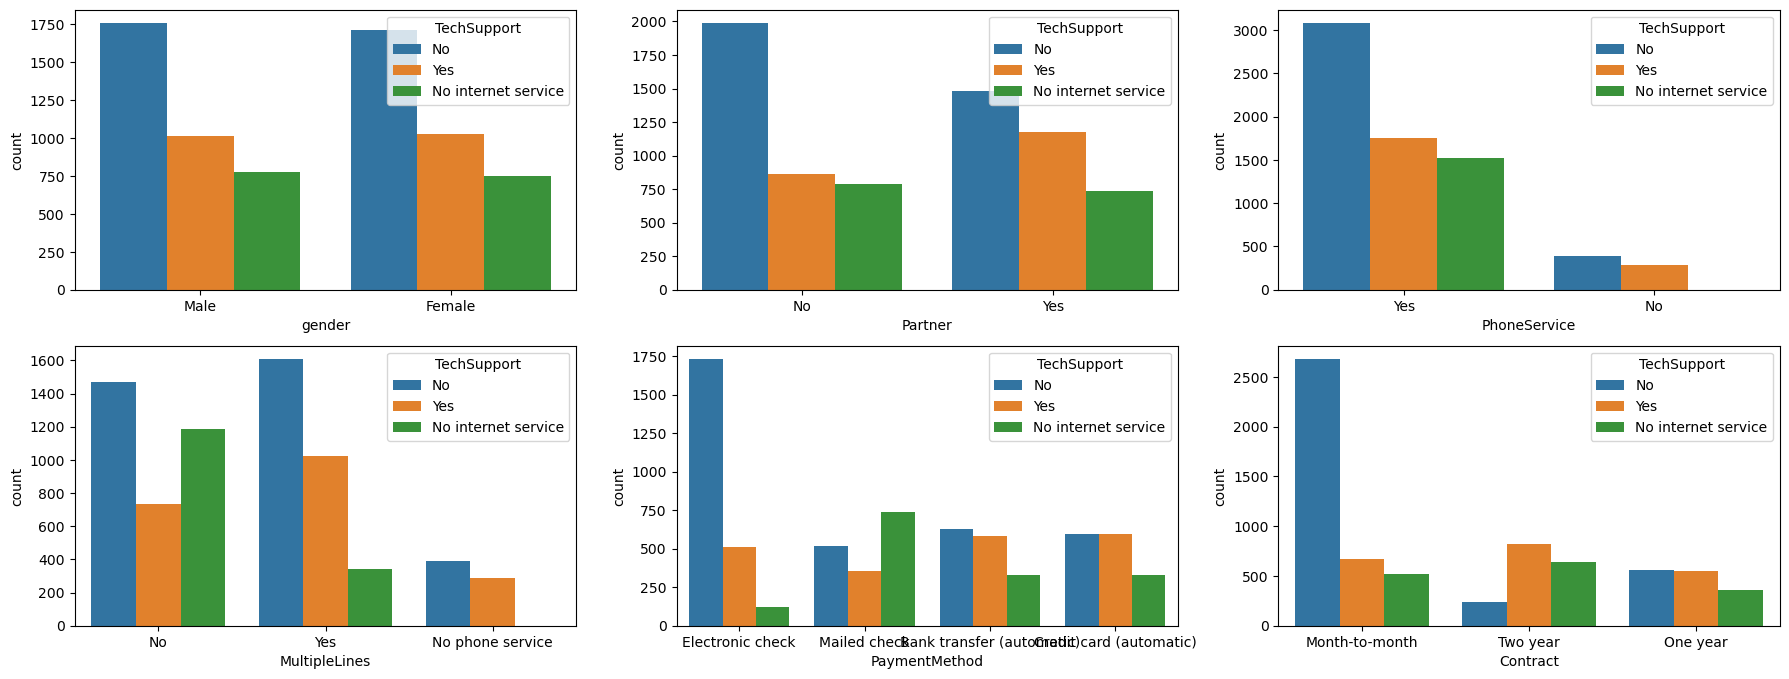

In [76]:
# Relationship between a key variable and other variables 
# TechSupport and some key variables

categorical_list = ['gender', 'Partner', 'PhoneService', 'MultipleLines', 'PaymentMethod', 'Contract']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 8))
axes = axes.flatten()

for i, var in enumerate(categorical_list):
    ax = axes[i]
    sns.countplot(data=mydata_set, x=var, ax=axes[i], order = categorical_df[var].value_counts().index, hue='TechSupport') 
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

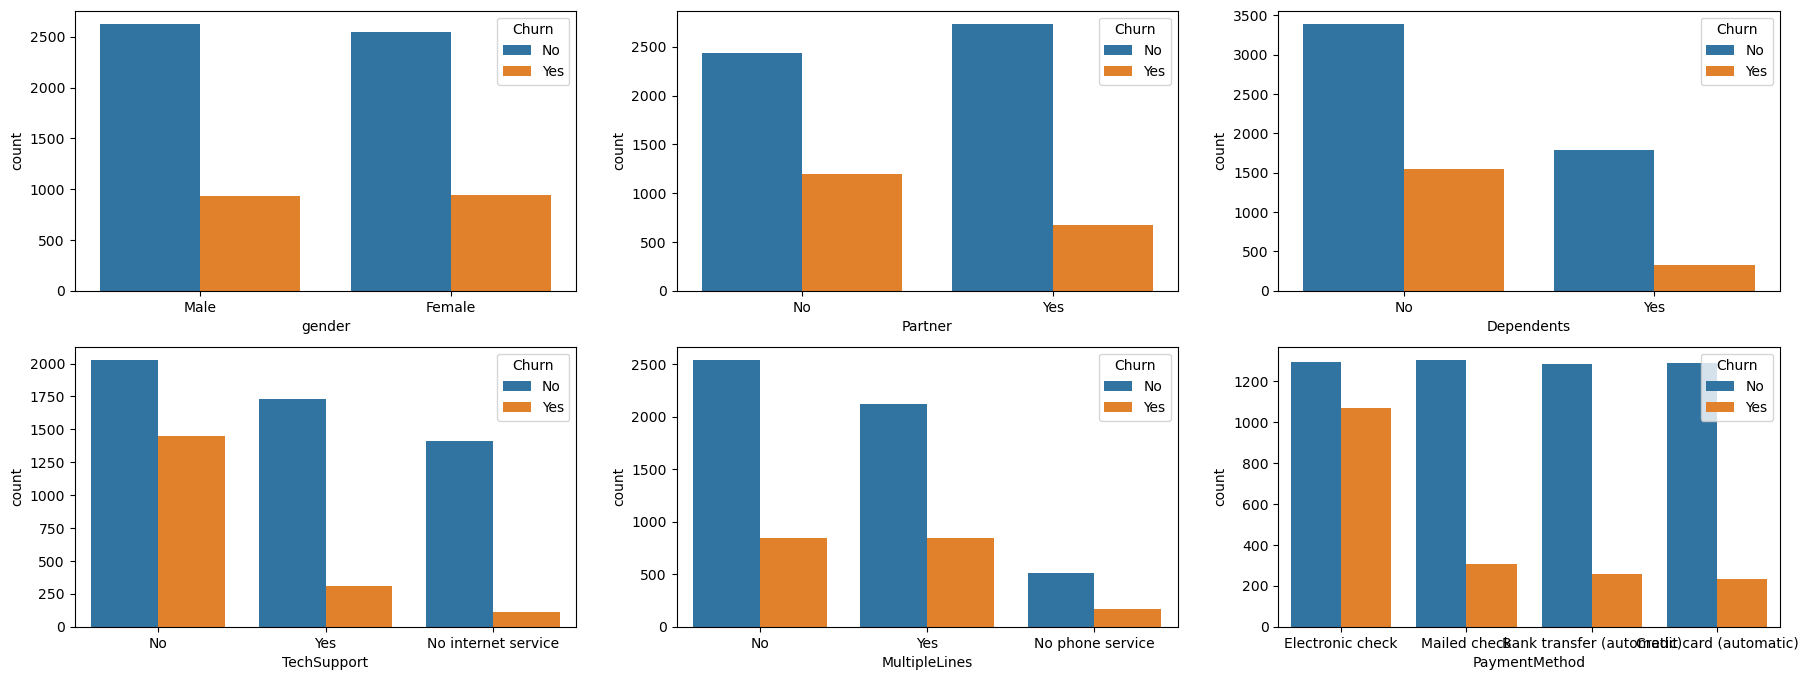

In [71]:
# Relationship between Churn and some key variables

categorical_list = ['gender', 'Partner', 'Dependents', 'TechSupport', 'MultipleLines', 'PaymentMethod']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 8))
axes = axes.flatten()

for i, var in enumerate(categorical_list):
    ax = axes[i]
    sns.countplot(data=mydata_set, x=var, ax=axes[i], order = categorical_df[var].value_counts().index, hue='Churn');
    
    
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

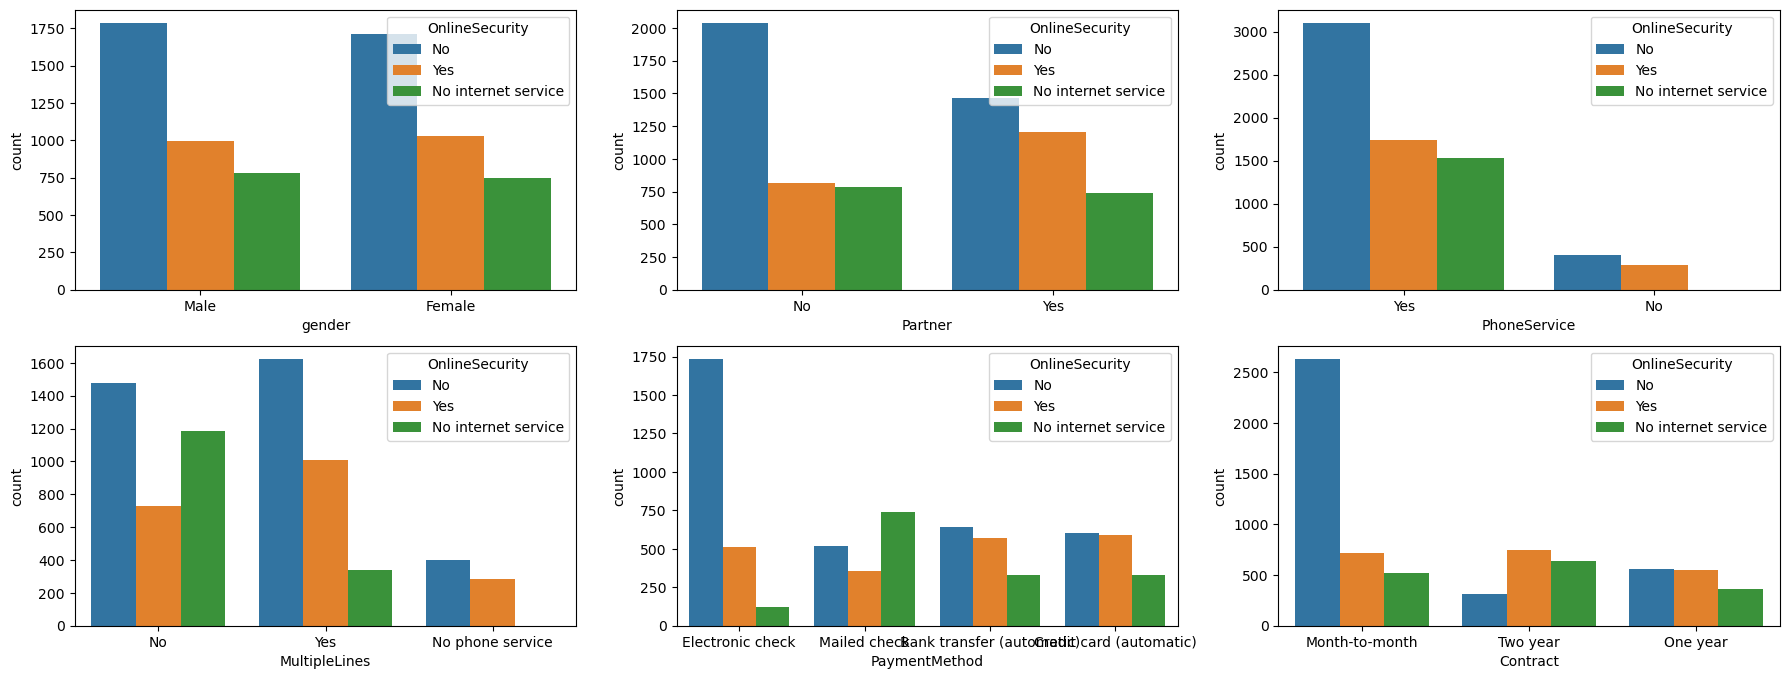

In [77]:
# Relationship between OnlineSecurity and some key variables

categorical_list = ['gender', 'Partner', 'PhoneService', 'MultipleLines', 'PaymentMethod', 'Contract']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 8))
axes = axes.flatten()

for i, var in enumerate(categorical_list):
    ax = axes[i]
    sns.countplot(data=mydata_set, x=var, ax=axes[i], order = categorical_df[var].value_counts().index, hue='OnlineSecurity') 
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

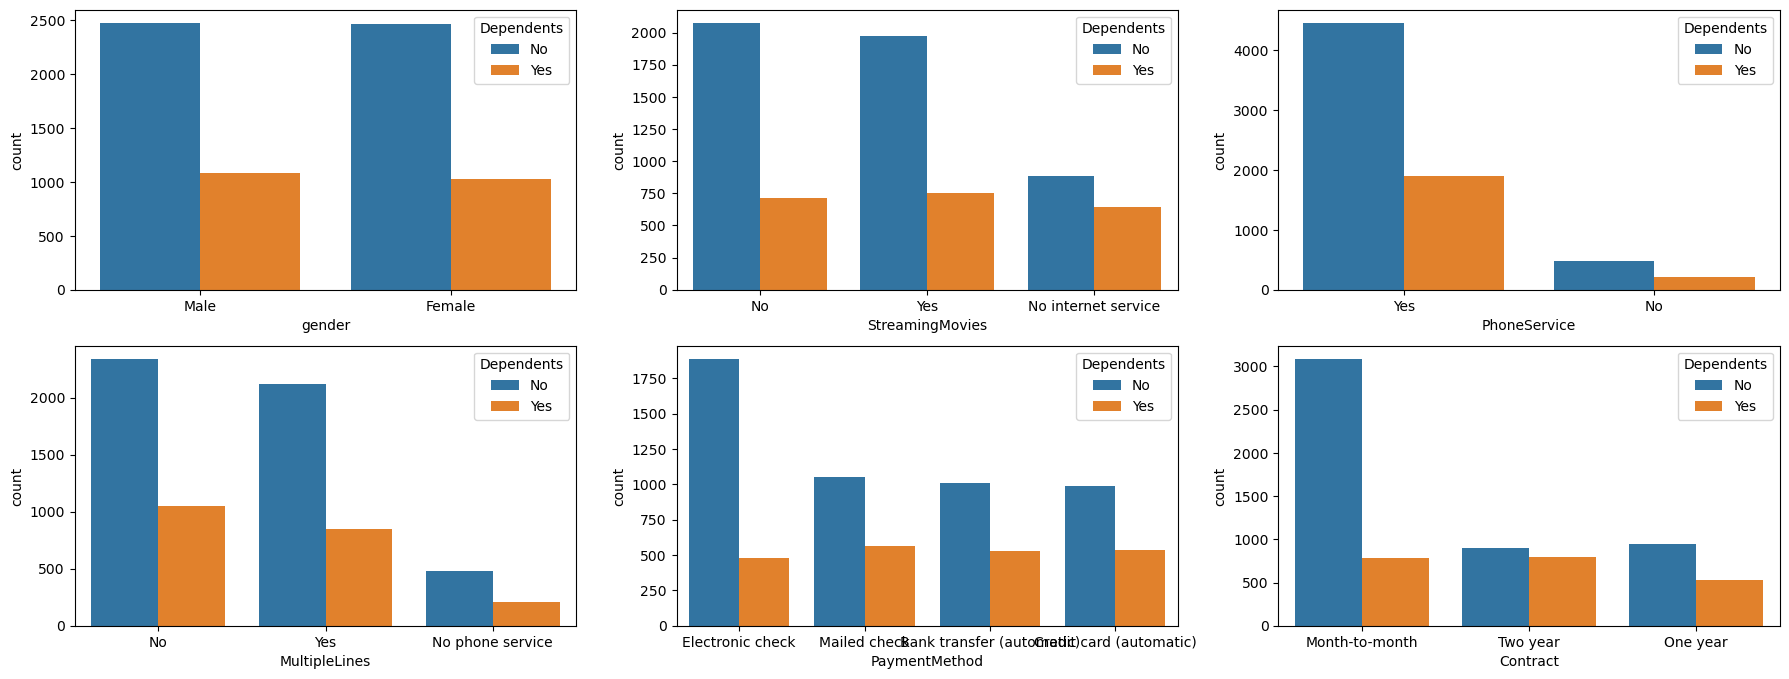

In [80]:
# Relationship between Dependents and some key variables

categorical_list = ['gender', 'StreamingMovies', 'PhoneService', 'MultipleLines', 'PaymentMethod', 'Contract']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 8))
axes = axes.flatten()

for i, var in enumerate(categorical_list):
    ax = axes[i]
    sns.countplot(data=mydata_set, x=var, ax=axes[i], order = categorical_df[var].value_counts().index, hue='Dependents') 
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

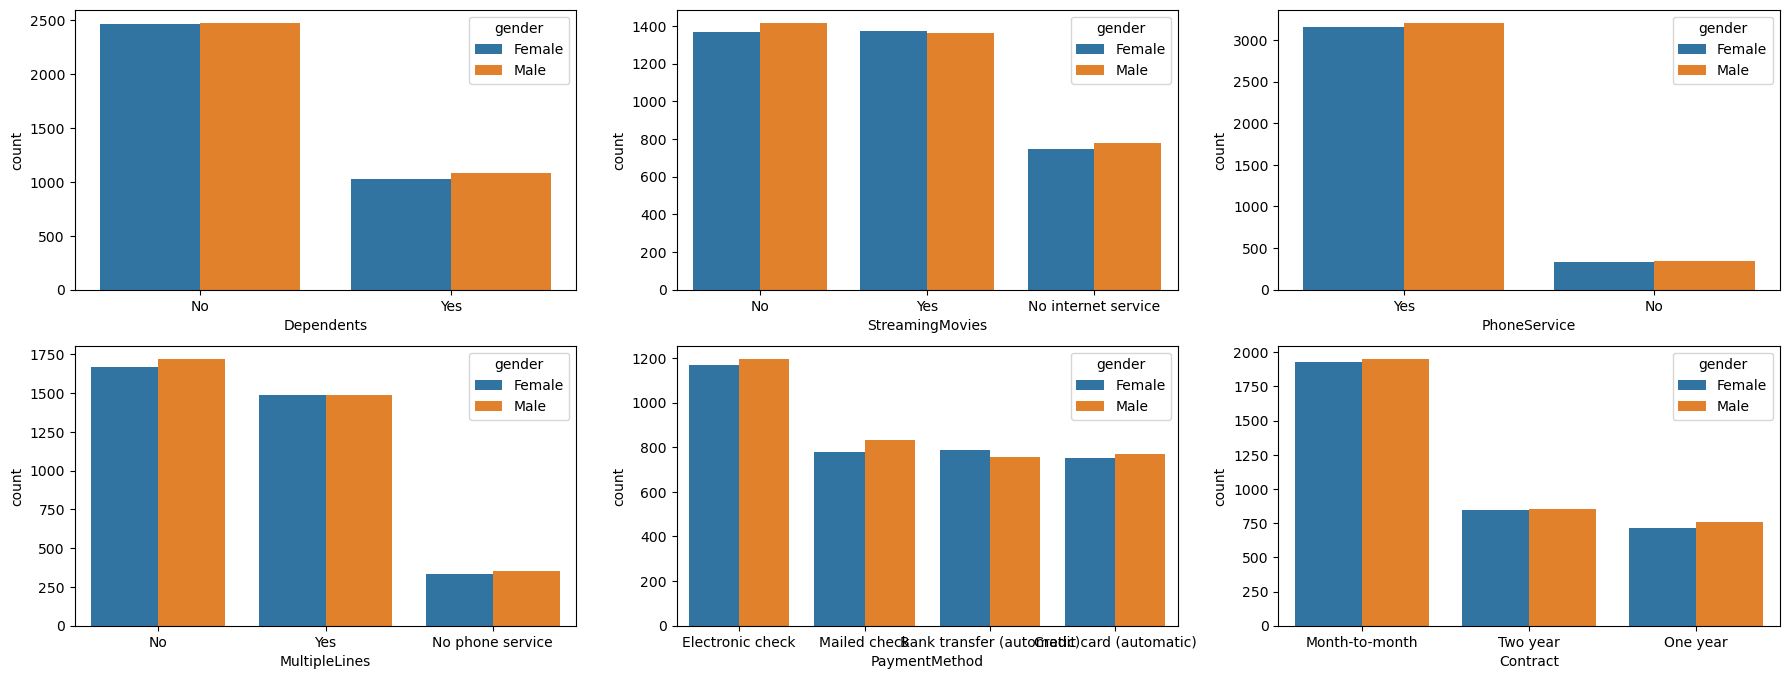

In [81]:
# Relationship between gender and some key variables

categorical_list = ['Dependents', 'StreamingMovies', 'PhoneService', 'MultipleLines', 'PaymentMethod', 'Contract']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 8))
axes = axes.flatten()

for i, var in enumerate(categorical_list):
    ax = axes[i]
    sns.countplot(data=mydata_set, x=var, ax=axes[i], order = categorical_df[var].value_counts().index, hue='gender') 
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

In [90]:
# Relationship between a categorical and numerical variable 
# MultipleLines vs TotalCharges

catnum_var = mydata_set.groupby(["MultipleLines"])["TotalCharges"].sum().reset_index().round(1)
catnum_var

,MultipleLines,TotalCharges
0,No,4576172.3
1,No phone service,1023089.9
2,Yes,10472278.8


In [94]:
catnum_var = catnum_var.sort_values(by = "TotalCharges", ascending=True)
catnum_var

,MultipleLines,TotalCharges
1,No phone service,1023089.9
0,No,4576172.3
2,Yes,10472278.8


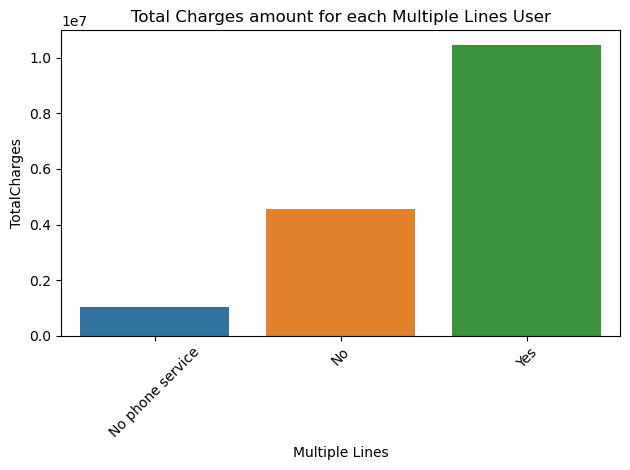

In [95]:
sns.barplot(data = catnum_var, x = "MultipleLines", y = "TotalCharges",)
plt.xlabel("Multiple Lines")
plt.ylabel("TotalCharges")
plt.title("Total Charges amount for each Multiple Lines User")
plt.xticks(rotation = 45)
plt.tight_layout()

In [96]:
# Dependents vs TotalCharges

catnum_var1 = mydata_set.groupby(["Dependents"])["TotalCharges"].sum().reset_index().round(1)
catnum_var1

,Dependents,TotalCharges
0,No,10791969.8
1,Yes,5279571.2


In [97]:
catnum_var1 = catnum_var1.sort_values(by = "TotalCharges", ascending=True)
catnum_var1

,Dependents,TotalCharges
1,Yes,5279571.2
0,No,10791969.8


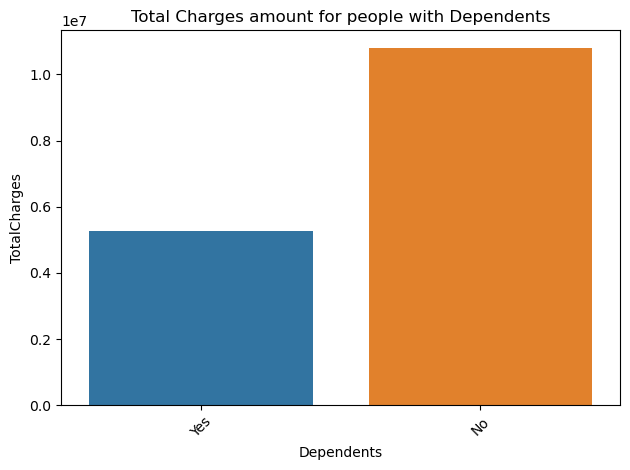

In [98]:
sns.barplot(data = catnum_var1, x = "Dependents", y = "TotalCharges",)
plt.xlabel("Dependents")
plt.ylabel("TotalCharges")
plt.title("Total Charges amount for people with Dependents")
plt.xticks(rotation = 45)
plt.tight_layout()

In [102]:
# InternetService vs TotalCharges

catnum_var2 = mydata_set.groupby(["InternetService"])["TotalCharges"].sum().reset_index().round(1)
catnum_var2

,InternetService,TotalCharges
0,DSL,5128398.2
1,Fiber optic,9923623.0
2,No,1019519.8


In [103]:
catnum_var2 = catnum_var2.sort_values(by = "TotalCharges", ascending=True)
catnum_var2

,InternetService,TotalCharges
2,No,1019519.8
0,DSL,5128398.2
1,Fiber optic,9923623.0


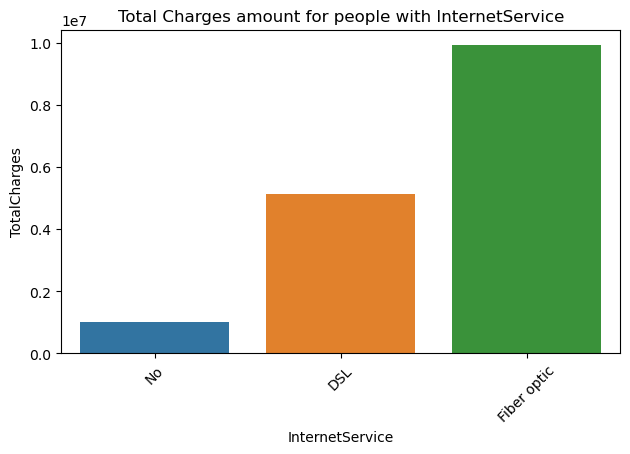

In [105]:
sns.barplot(data = catnum_var2, x = "InternetService", y = "TotalCharges",)
plt.xlabel("InternetService")
plt.ylabel("TotalCharges")
plt.title("Total Charges amount for people with InternetService")
plt.xticks(rotation = 45)
plt.tight_layout()

#### Multivariate Analysis

In [ ]:
# Relationship between numerical values in the data set using churn

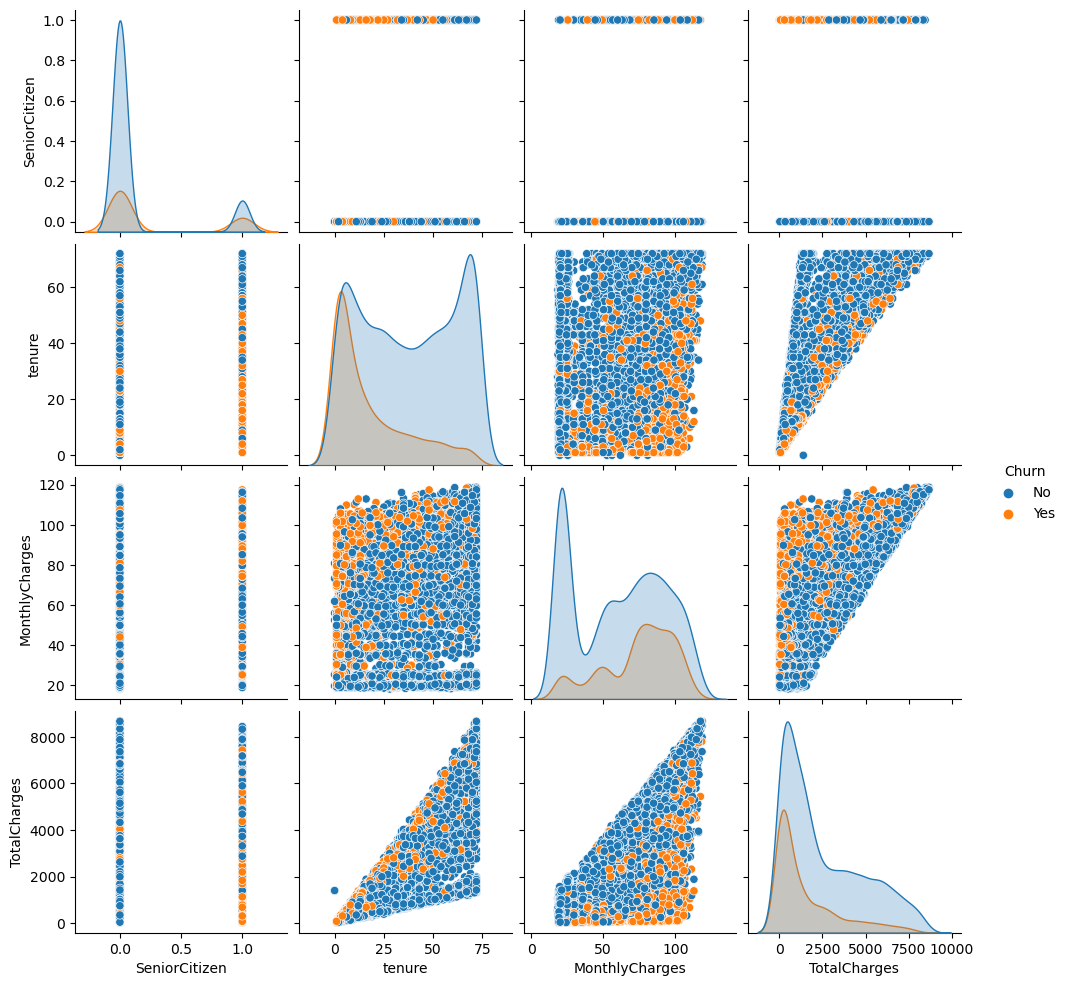

In [108]:
sns.pairplot(mydata_set, hue="Churn")

## Perform Feature Engineering

### a) Encoding categorical variables

In [ ]:
# Encoding categorical variables Gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, 
# OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod
# using LabelEncoder

In [137]:
label_encoder = LabelEncoder()
categorical_data = mydata_set.select_dtypes(include='object').columns
for var in categorical_data:
    mydata_set[var] = label_encoder.fit_transform(mydata_set[var])

mydata_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio,HasPhoneAndInternet,HasStreamingServices,FamilySize,SeniorCitizenStatus,TotalServices
0,0,0,1,0,1,0,1,0,0,2,...,2,29.85,29.85,0,1.000000,0,0,2,0,2
1,1,0,0,0,34,1,0,0,2,0,...,3,56.95,1889.50,0,0.030140,0,0,1,0,4
2,1,0,0,0,2,1,0,0,2,2,...,3,53.85,108.15,1,0.497920,0,0,1,0,4
3,1,0,0,0,45,0,1,0,2,0,...,0,42.30,1840.75,0,0.022980,0,0,1,0,6
4,0,0,0,0,2,1,0,1,0,0,...,2,70.70,151.65,1,0.466205,1,0,1,0,0


### b) Create new features from existing features

In [118]:
# Based on some of the insights drawn from the EDA, we would be creating some new features
# Create a new feature 'MonthlyChargeRatio' representing the ratio of MonthlyCharges to TotalCharges

mydata_set['MonthlyChargeRatio'] = mydata_set['MonthlyCharges'] / mydata_set['TotalCharges']

In [119]:
# Create a new feature 'HasPhoneAndInternet' to indicate if a customer has both phone and internet service

mydata_set['HasPhoneAndInternet'] = (mydata_set['PhoneService'] & mydata_set['InternetService'])

In [120]:
# Create a new feature 'HasStreamingServices' to indicate if a customer has either streaming TV or streaming movies service

mydata_set['HasStreamingServices'] = (mydata_set['StreamingTV'] | mydata_set['StreamingMovies'])

In [121]:
# Create a new feature 'FamilySize' to indicate the size of the customer's family (including themselves)

mydata_set['FamilySize'] = 1  # Initialize with 1 to account for the customer themselves
mydata_set['FamilySize'] += mydata_set['Partner']  # Add 1 if the customer has a partner
mydata_set['FamilySize'] += mydata_set['Dependents']  # Add 1 if the customer has dependents

In [122]:
# Create the 'SeniorCitizenStatus' feature to indicate if a customer is a senior citizen or not

def SeniorCitizenStatus(SeniorCitizen):
    if SeniorCitizen == 0:
        return "No"
    else:
        return "Yes"
    
mydata_set['SeniorCitizenStatus'] = mydata_set['SeniorCitizen'].apply(SeniorCitizenStatus)

In [123]:
# Create the TotalServices feature
# This represents the total count of all additional services subscribed to by the customer

# List of columns representing additional services
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create the TotalServices feature by summing up the count of all additional services subscribed to by the customer
mydata_set['TotalServices'] = mydata_set[service_columns].sum(axis=1)


In [138]:
mydata_set.head().T

,0,1,2,3,4
gender,0.00,1.00000,1.00000,1.00000,0.000000
SeniorCitizen,0.00,0.00000,0.00000,0.00000,0.000000
Partner,1.00,0.00000,0.00000,0.00000,0.000000
Dependents,0.00,0.00000,0.00000,0.00000,0.000000
tenure,1.00,34.00000,2.00000,45.00000,2.000000
PhoneService,0.00,1.00000,1.00000,0.00000,1.000000
MultipleLines,1.00,0.00000,0.00000,1.00000,0.000000
InternetService,0.00,0.00000,0.00000,0.00000,1.000000
OnlineSecurity,0.00,2.00000,2.00000,2.00000,0.000000
OnlineBackup,2.00,0.00000,2.00000,0.00000,0.000000


## Model Selection, Training, and Validation

### a) Train and test at least 3 supervised learning model

#### Step 1: Data Preprocessing

In [132]:
# Define features (X) and target variable (y)

X = mydata_set.drop(columns=['Churn'])
y = mydata_set['Churn']

In [142]:
label_encoder = LabelEncoder()
categorical_data = mydata_set.select_dtypes(include='object').columns
for var in categorical_data:
    mydata_set[var] = label_encoder.fit_transform(mydata_set[var])

#### Step 2: Split Data into training and testing sets

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3: Select Models

In [140]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [145]:
# There was an error on the X_train data
#Check for non-numeric values in X_train

non_numeric_X_train = X_train.select_dtypes(exclude=['number'])
print(non_numeric_X_train.head())

     SeniorCitizenStatus
2142                  No
1623                  No
6074                  No
1362                  No
6754                  No


In [148]:
label_encoder = LabelEncoder()

In [151]:
X_train['SeniorCitizenStatus'] = label_encoder.fit_transform(X_train['SeniorCitizenStatus'])

#### Step 4: Train Models

In [167]:
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

#### Step 5: Evaluate Models

In [168]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")

Model: Logistic Regression
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Model: Random Forest
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Model: Support Vector Machine
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00  

## Model evaluation

### a). Analyze the results of your trained model

#### Based on the provided performance metrics, we can analyze the models as follows:

Logistic Regression:
Accuracy: 0.81
Precision for class 0: 0.85
Recall for class 0: 0.90
Precision for class 1: 0.67
Recall for class 1: 0.55
F1-score: 0.80

Analysis: Logistic Regression shows good overall accuracy and precision for class 0, indicating it performs well in predicting non-churn cases. 
However, its Recall and F1-score for class 1 are relatively lower, suggesting it might struggle in correctly identifying churn cases.


Random Forest:
Accuracy: 0.79
Precision for class 0: 0.83
Recall for class 0: 0.91
Precision for class 1: 0.65
Recall for class 1: 0.47
F1-score: 0.78

Analysis: Random Forest performs similarly to Logistic Regression in terms of accuracy. It shows higher recall for class 0 but lower recall for class 1 compared to Logistic Regression.


Support Vector Machine (SVM):
Accuracy: 0.74
Precision for class 0: 0.74
Recall for class 0: 1.00
Precision for class 1: 0.00
Recall for class 1: 0.00
F1-score: 0.62

Analysis: SVM achieves a high recall for class 0, but its recall and precision for class 1 are both extremely low, resulting in poor performance in identifying churn cases.


Considering these results, Logistic Regression seems to be the most balanced model in terms of accuracy, precision, recall, and F1-score. It provides a reasonable trade-off between correctly predicting both churn and non-churn cases. 

Overall, while logistic regression demonstrates the highest performance among the 3 models, there is still room for improvement in terms of accurately identifying churned customers. Further optimization and fine-tuning of the models may be necessary to enhance predictive performance and provide more reliable insights for the ConnectTel's churn prediction efforts.

### b). What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives?

##### For the problem of customer churn prediction, several metrics are crucial for evaluating model performance, including:

Accuracy: Accuracy measures the proportion of correctly predicted instances out of the total instances. While accuracy is a common metric, it may not be the most suitable for imbalanced datasets like customer churn prediction, where the classes are unevenly distributed.

Precision and Recall: Precision measures the proportion of true positive predictions out of all positive predictions, while recall measures the proportion of true positive predictions out of all actual positives. Precision is the ability of the classifier not to label as positive a sample that is negative, while recall is the ability of the classifier to find all positive samples.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when the class distribution is uneven.

Confusion Matrix: The confusion matrix provides a breakdown of true positive, true negative, false positive, and false negative predictions, allowing for a more detailed analysis of model performance.

In the context of customer churn prediction for ConnectTel Telecom Company, the business should be more concerned with minimizing false negatives rather than focusing solely on true positives. False negatives represent cases where the model incorrectly predicts that a customer will not churn when they actually do churn. This can be costly for the business as it may result in missed opportunities to implement retention strategies and retain valuable customers. Therefore, maximizing recall (minimizing false negatives) is crucial to ensure that the company identifies and addresses as many potential churners as possible.

However, this does not mean that precision (minimizing false positives) should be disregarded. False positives represent cases where the model incorrectly predicts that a customer will churn when they do not. While false positives may lead to unnecessary retention efforts for customers who were not at risk of churning, they are generally less costly than false negatives. Therefore, it's important to strike a balance between precision and recall, with a focus on maximizing recall to minimize the number of missed churn cases.